In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
from skfuzzy import control as ctrl

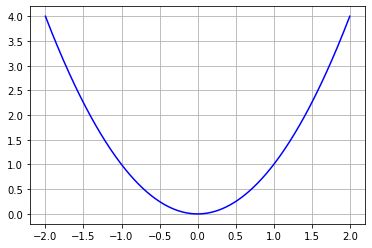

In [61]:
# Universe Variables:
x = np.linspace(-2, 2, 5000)
y = np.linspace(0, 4, 5000)
y_real = x**2
plt.plot(x, y_real, 'b-')
plt.grid()

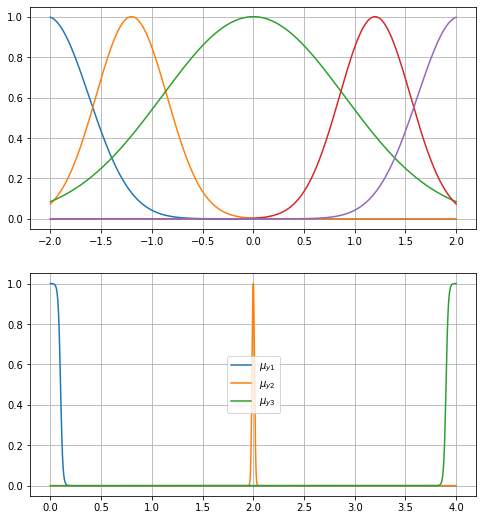

In [62]:
# Membership Functions
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(8, 9))
mu_x_1 = fuzz.gaussmf(x, -2.03, 0.41)
mu_x_2 = fuzz.gaussmf(x, -1.2, 0.35)
mu_x_3 = fuzz.gaussmf(x, 0, 0.9)
mu_x_4 = fuzz.gaussmf(x, 1.2, 0.35)
mu_x_5 = fuzz.gaussmf(x, 2.03, 0.41)
ax0.plot(x, mu_x_1,'-',x, mu_x_2,'-', x, mu_x_3,'-', x, mu_x_4,'-', x, mu_x_5,'-')
legend = plt.legend([r'$\mu_{x1}$', r'$\mu_{x2}$', r'$\mu_{x3}$', r'$\mu_{x4}$', r'$\mu_{x5}$'])
ax0.grid()

mu_y_1 = fuzz.sigmf(y, 0.1, -90)
mu_y_2 = fuzz.gaussmf(y, 2, 0.012)
mu_y_3 = fuzz.sigmf(y, 3.9, 90)
ax1.plot(y, mu_y_1,'-',y, mu_y_2,'-', y, mu_y_3,'-')
legend = plt.legend([r'$\mu_{y1}$', r'$\mu_{y2}$', r'$\mu_{y3}$'])
ax1.grid()

In [63]:
y_hat = []
for xi in x:
    # Activation of our fuzzy membership functions at these values.
    x1 = fuzz.interp_membership(x, mu_x_1, xi)
    x2 = fuzz.interp_membership(x, mu_x_2, xi)
    x3 = fuzz.interp_membership(x, mu_x_3, xi)
    x4 = fuzz.interp_membership(x, mu_x_4, xi)
    x5 = fuzz.interp_membership(x, mu_x_5, xi)
    
    # Rule application
    y_1 = np.fmin(np.fmax(x1, x5), mu_y_3)
    y_2 = np.fmin(np.fmax(x2, x4), mu_y_2)
    y_3 = np.fmin(x3, mu_y_1)
    
    # Aggregate all three output membership functions together
    aggregated = np.fmax(y_1, np.fmax(y_2, y_3))
    
    # Calculate defuzzified result
    y_hat.append(fuzz.defuzz(y, aggregated, 'centroid'))

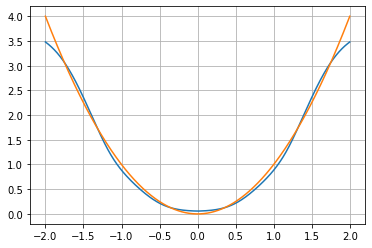

In [64]:
plt.plot(x, y_hat, x, y_real)
plt.grid()

In [65]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_real, y_hat)

0.013890221379226159

In [7]:
def objective_function(v):
    mu_x_1 = fuzz.gaussmf(x, v[0],v[1])
    mu_x_2 = fuzz.gaussmf(x, v[2],v[3])
    mu_x_3 = fuzz.gaussmf(x, v[4],v[5])
    mu_x_4 = fuzz.gaussmf(x, v[6],v[7])
    mu_x_5 = fuzz.gaussmf(x, v[8],v[9])

    mu_y_1 = fuzz.gaussmf(y, v[10],v[11])
    mu_y_2 = fuzz.gaussmf(y, v[12],v[13])
    mu_y_3 = fuzz.gaussmf(y, v[14],v[15])
    y_hat = []
    for xi in x:
        # Activation of our fuzzy membership functions at these values.
        x1 = fuzz.interp_membership(x, mu_x_1, xi)
        x2 = fuzz.interp_membership(x, mu_x_2, xi)
        x3 = fuzz.interp_membership(x, mu_x_3, xi)
        x4 = fuzz.interp_membership(x, mu_x_4, xi)
        x5 = fuzz.interp_membership(x, mu_x_5, xi)
    
        # Rule application
        y_1 = np.fmin(np.fmax(x1, x5), mu_y_3)
        y_2 = np.fmin(np.fmax(x2, x4), mu_y_2)
        y_3 = np.fmin(x3, mu_y_1)
    
        # Aggregate all three output membership functions together
        aggregated = np.fmax(y_1, np.fmax(y_2, y_3))
    
        # Calculate defuzzified result
        y_hat.append(fuzz.defuzz(y, aggregated, 'centroid'))
    return mean_squared_error(y_real, y_hat)  


/home/vitor/-/.virtualenvs/k36/lib/python3.6/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


 The best solution found:                                                                           
 [-1.47166961  0.3689627  -0.5802273   0.47685907  1.94568715  0.55373992
  0.31034987  0.60159007 -1.95857935  0.24718763  3.95094161  0.08177026
  0.00759224  0.26958952  3.95228352  0.06883952]

 Objective function:
 0.019813654804398267


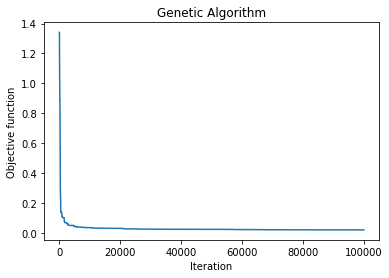

[-1.47166961  0.3689627  -0.5802273   0.47685907  1.94568715  0.55373992
  0.31034987  0.60159007 -1.95857935  0.24718763  3.95094161  0.08177026
  0.00759224  0.26958952  3.95228352  0.06883952]


In [8]:
from geneticalgorithm import geneticalgorithm as ga
aux = np.array([[[-2,2], [0, 4]]*5, [[0, 4], [0, 4]]*3])
varbound = []
for i in range(len(aux)):
    for j in range(len(aux[i])):
        varbound.append(aux[i][j])
varbound = np.array(varbound)

algorithm_param = {'max_num_iteration': 100000,\
                   'population_size':100,\
                   'mutation_probability':0.15,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

model=ga(function=objective_function, dimension=2*8, variable_type='real',variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()
v = model.output_dict['variable']
print(v) 

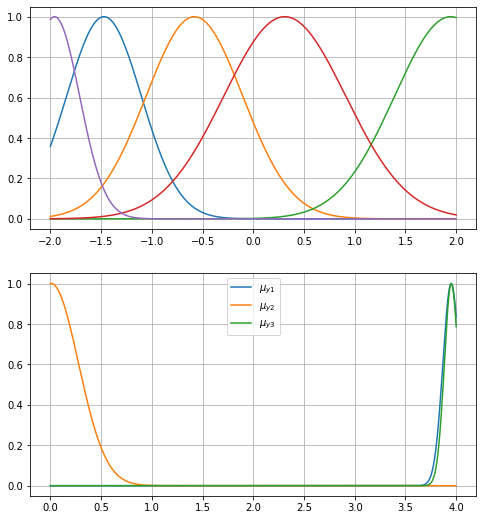

In [34]:
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(8, 9))
x = np.linspace(-2, 2, 5000)
y = np.linspace(0, 4, 5000)
y_real = x**2
mu_x_1 = fuzz.gaussmf(x, v[0],v[1])
mu_x_2 = fuzz.gaussmf(x, v[2],v[3])
mu_x_3 = fuzz.gaussmf(x, v[4],v[5])
mu_x_4 = fuzz.gaussmf(x, v[6],v[7])
mu_x_5 = fuzz.gaussmf(x, v[8],v[9])
ax0.plot(x, mu_x_1,'-', x, mu_x_2,'-', x, mu_x_3,'-', x, mu_x_4,'-', x, mu_x_5,'-')
legend = plt.legend([r'$\mu_{x1}$', r'$\mu_{x2}$', r'$\mu_{x3}$', r'$\mu_{x4}$', r'$\mu_{x5}$'])
ax0.grid()

mu_y_1 = fuzz.gaussmf(y, v[10],v[11])
mu_y_2 = fuzz.gaussmf(y, v[12],v[13])
mu_y_3 = fuzz.gaussmf(y, v[14],v[15])
ax1.plot(y, mu_y_1,'-', y, mu_y_2,'-', y, mu_y_3,'-')
legend = plt.legend([r'$\mu_{y1}$', r'$\mu_{y2}$', r'$\mu_{y3}$'])
ax1.grid()
y_hat = []
for xi in x:
    # Activation of our fuzzy membership functions at these values.
    x1 = fuzz.interp_membership(x, mu_x_1, xi)
    x2 = fuzz.interp_membership(x, mu_x_2, xi)
    x3 = fuzz.interp_membership(x, mu_x_3, xi)
    x4 = fuzz.interp_membership(x, mu_x_4, xi)
    x5 = fuzz.interp_membership(x, mu_x_5, xi)
    
    # Rule application
    y_1 = np.fmin(np.fmax(x1, x5), mu_y_3)
    y_2 = np.fmin(np.fmax(x2, x4), mu_y_2)
    y_3 = np.fmin(x3, mu_y_1)
    
    # Aggregate all three output membership functions together
    aggregated = np.fmax(y_1, np.fmax(y_2, y_3))
    
    # Calculate defuzzified result
    y_hat.append(fuzz.defuzz(y, aggregated, 'centroid')) 

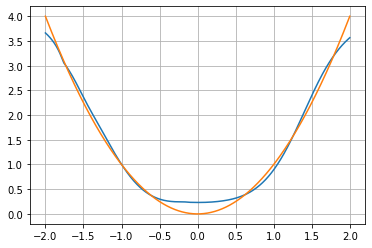

In [35]:
plt.plot(x, y_hat, x, y_real)
plt.grid()

In [36]:
mean_squared_error(y_real, y_hat)


0.01647182760948535